In [1]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import dask

load one year
(binned dataset as an example)

In [2]:
path_in =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/'


In [3]:
year = 2020

# read all nc in folder year/ within path_in as xarray dataset

ds = xr.open_mfdataset(path_in + str(year) + '/*.nc', combine='by_coords')
ds




<xarray.Dataset>
Dimensions:    (time: 245, latitude: 1248, longitude: 1056)
Coordinates:
  * time       (time) datetime64[ns] 2020-03-01 2020-03-02 ... 2020-10-31
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(31, 1248, 1056), meta=np.ndarray>

Seguendo il protocollo proposto da Ferreira et al., 2021 provo a fare lo smooting 3d

In [4]:
# Funzione per calcolare la media ignorando i NaN
def nanmean(array):
    return np.nanmean(array)

# smooth ds with a 3 x 3 moving window lungo gli assi x e y e time, riempiendo i valori nulli con la media
ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean().rolling(longitude=3, center=True, min_periods=1).mean()


provo a confrontare l'effetto


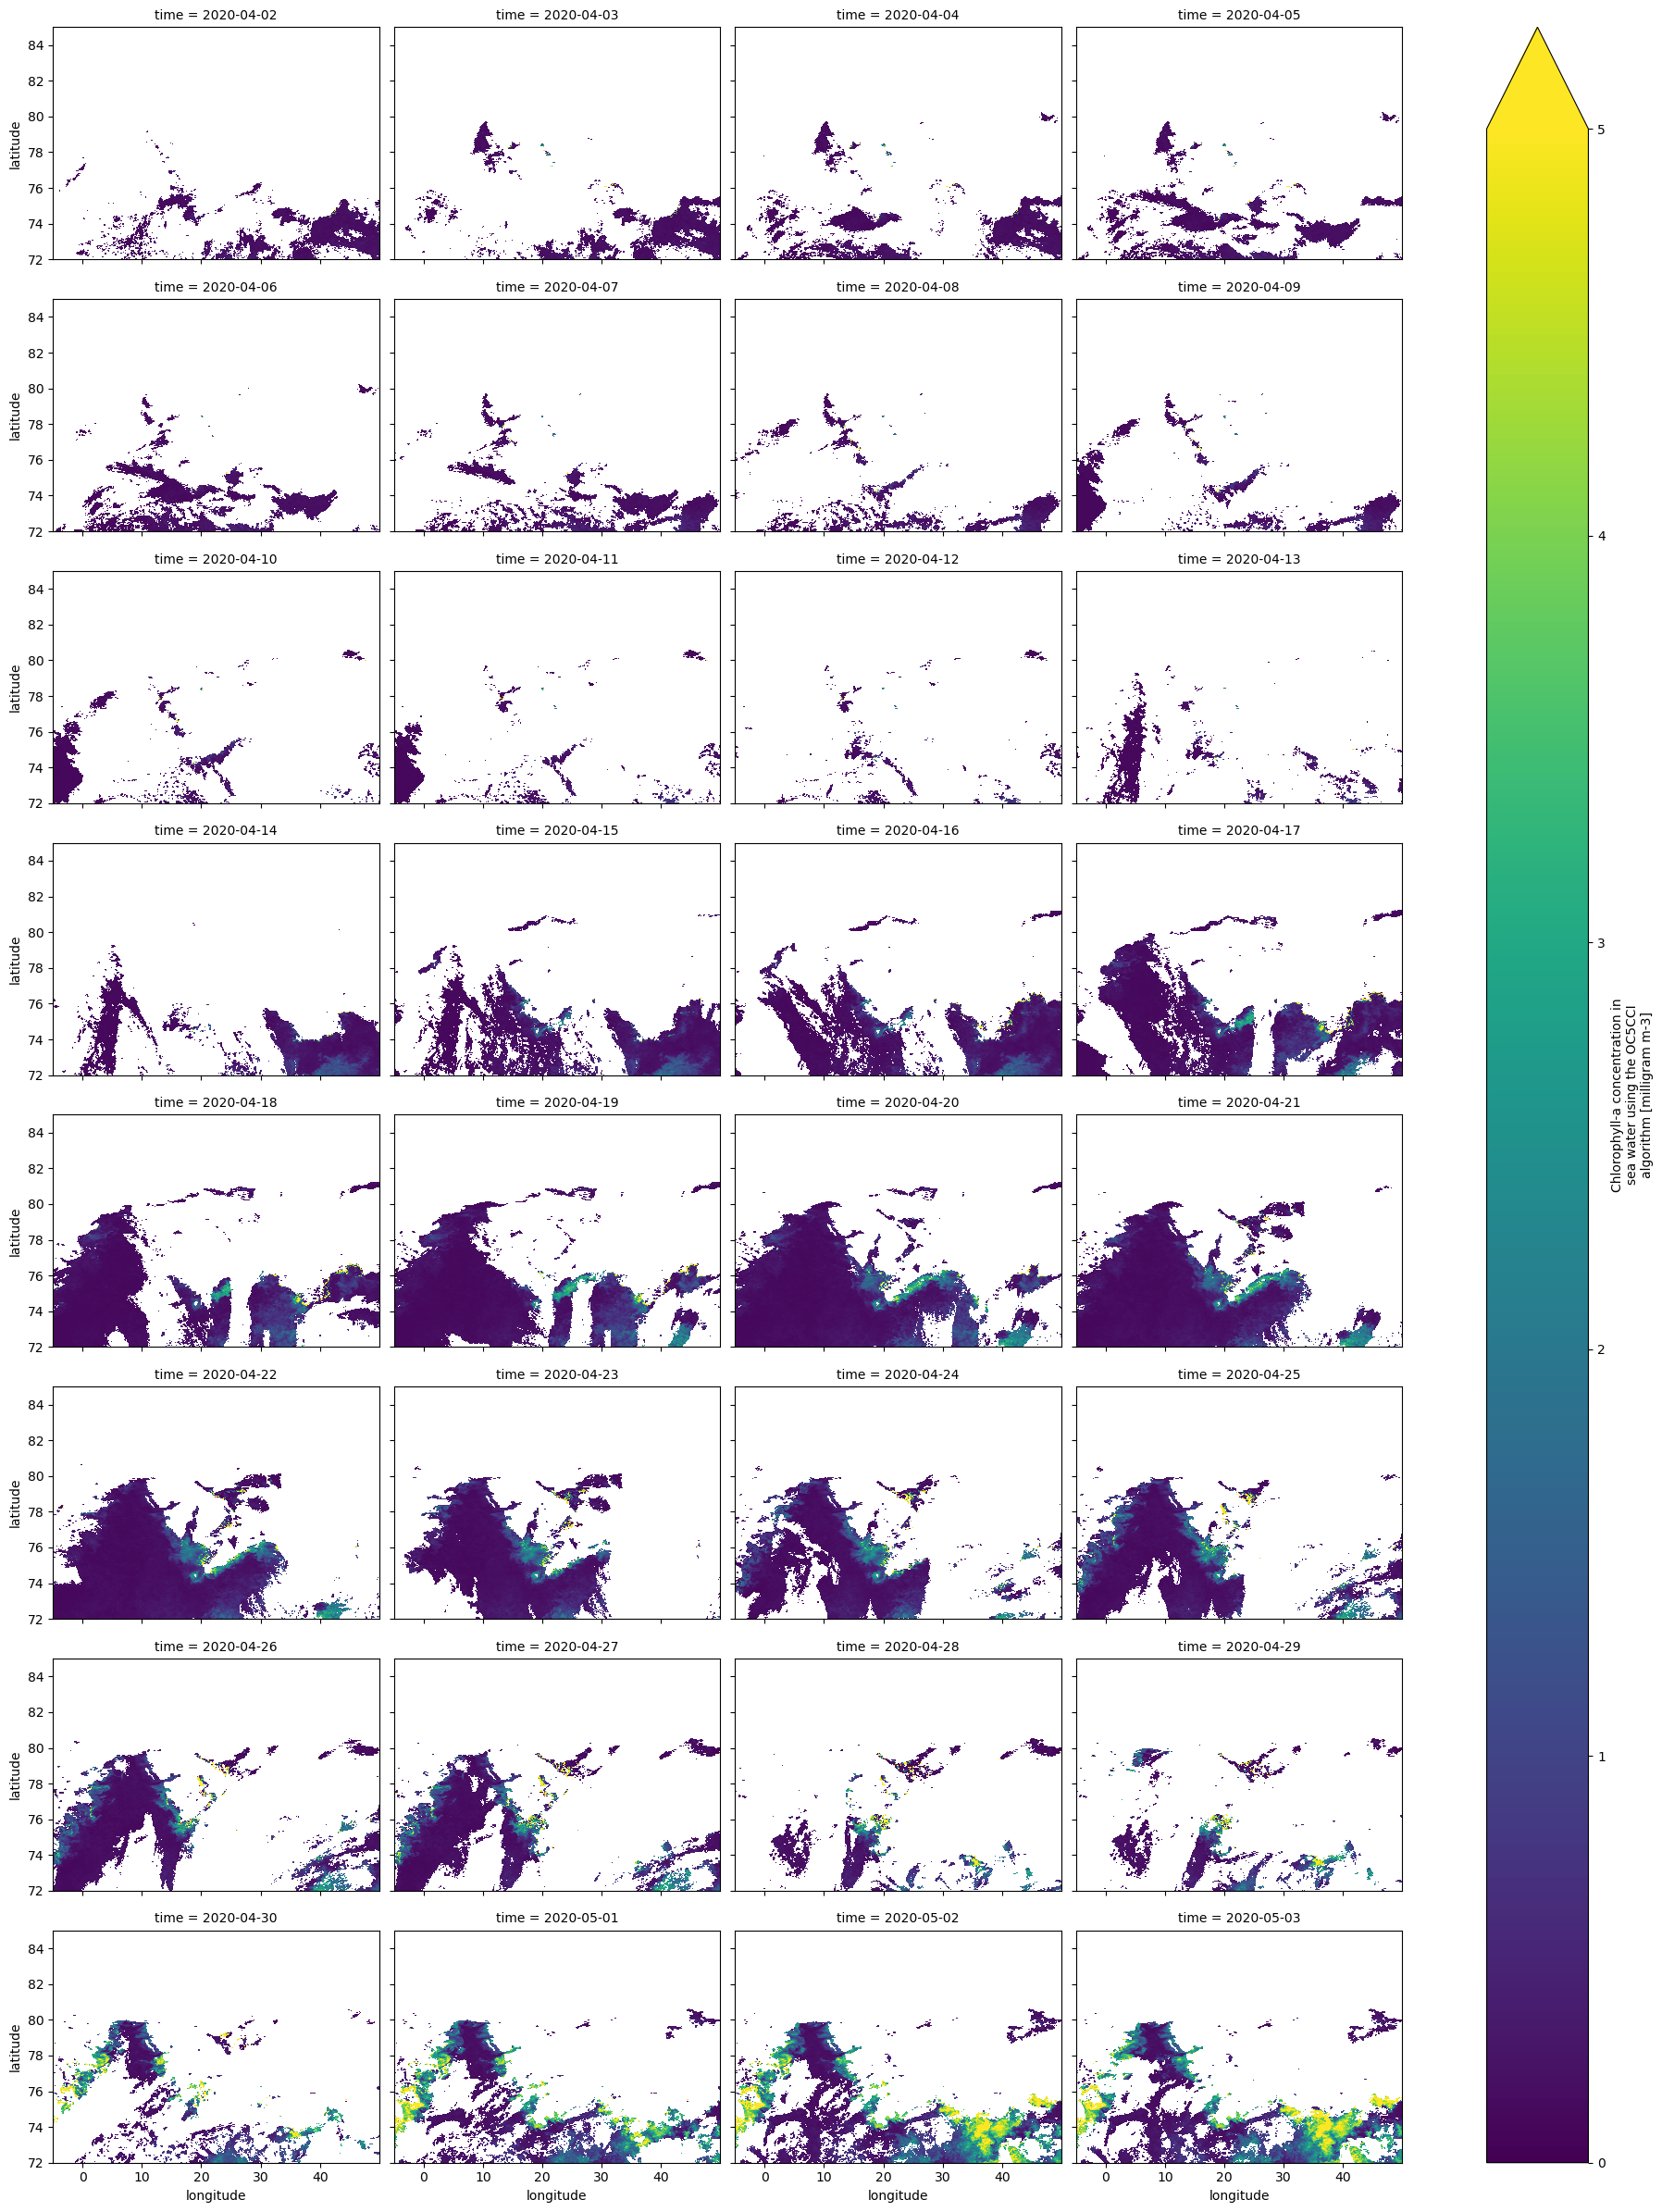

In [6]:
ds_smooth.isel(time  =slice(32,64))['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=5, size=3, aspect=1.5)


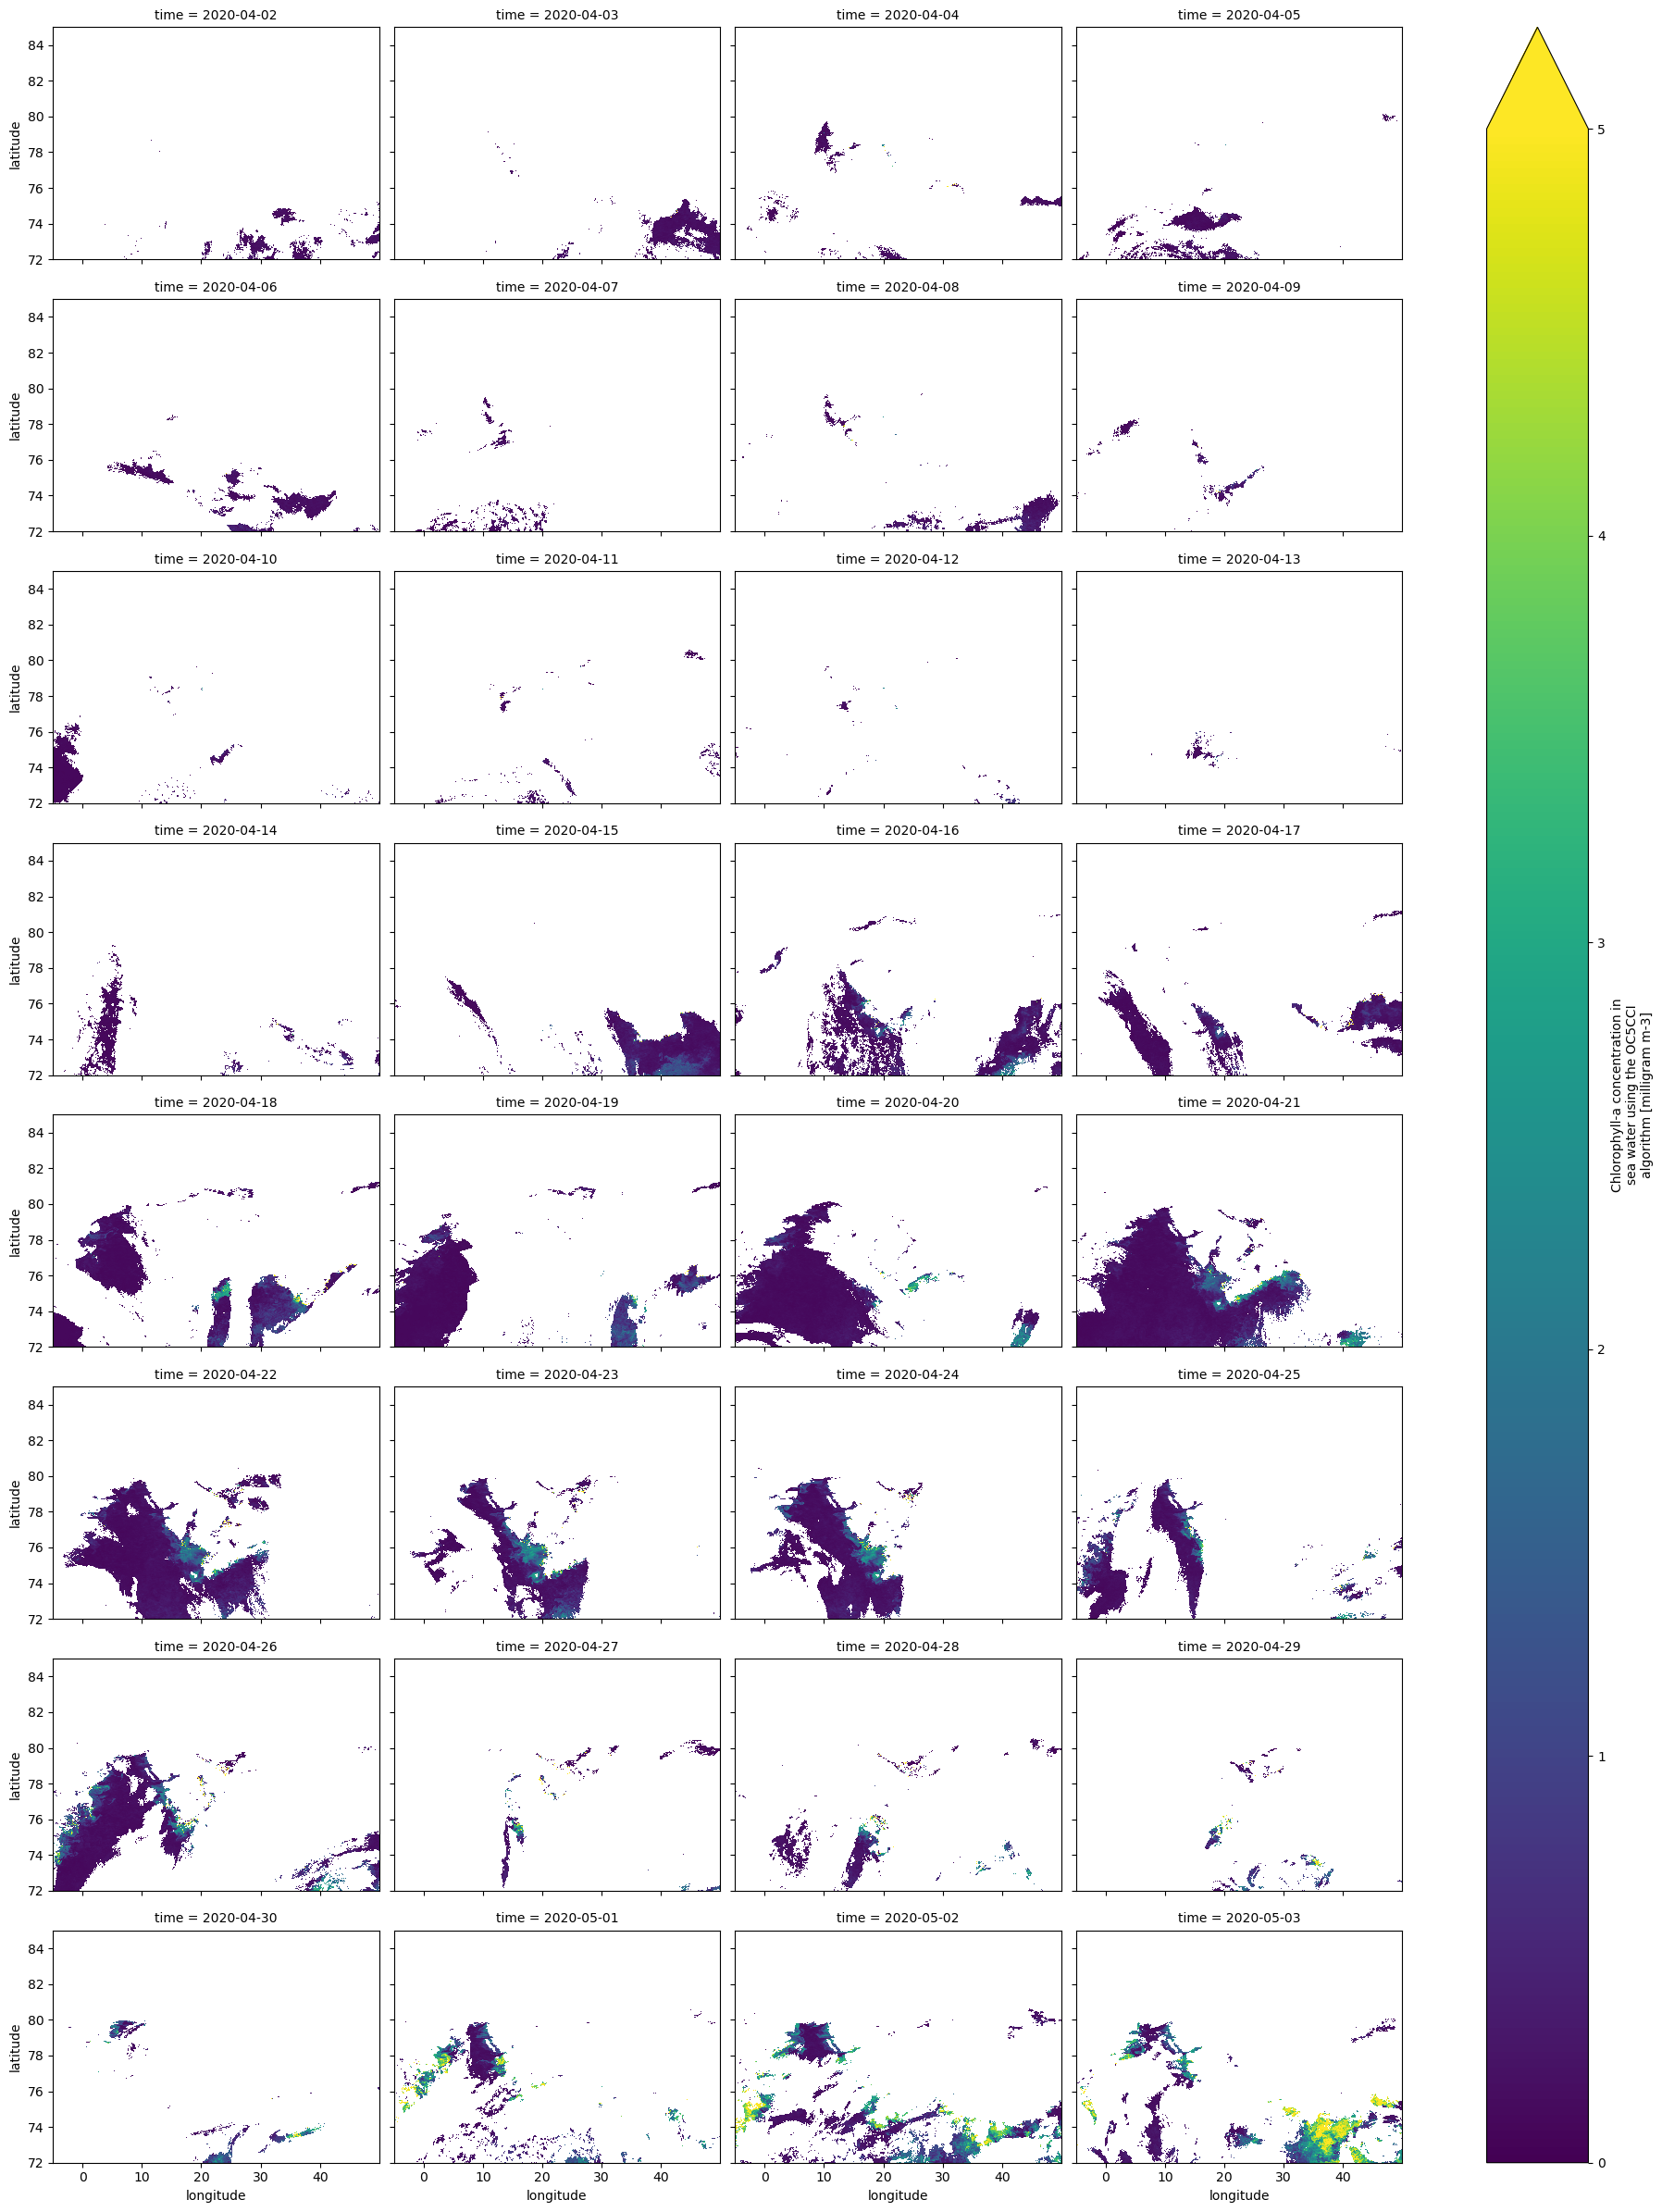

In [10]:
# grafico con dati originali
ds.isel(time  =slice(32,64))['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=5, size=3, aspect=1.5)


In [7]:
# rolling mean for smoothing on 3 weeks using nanmean function starting from ds_smooth
ds_3w= ds_smooth.rolling(time=21, center=True, min_periods=1).mean()


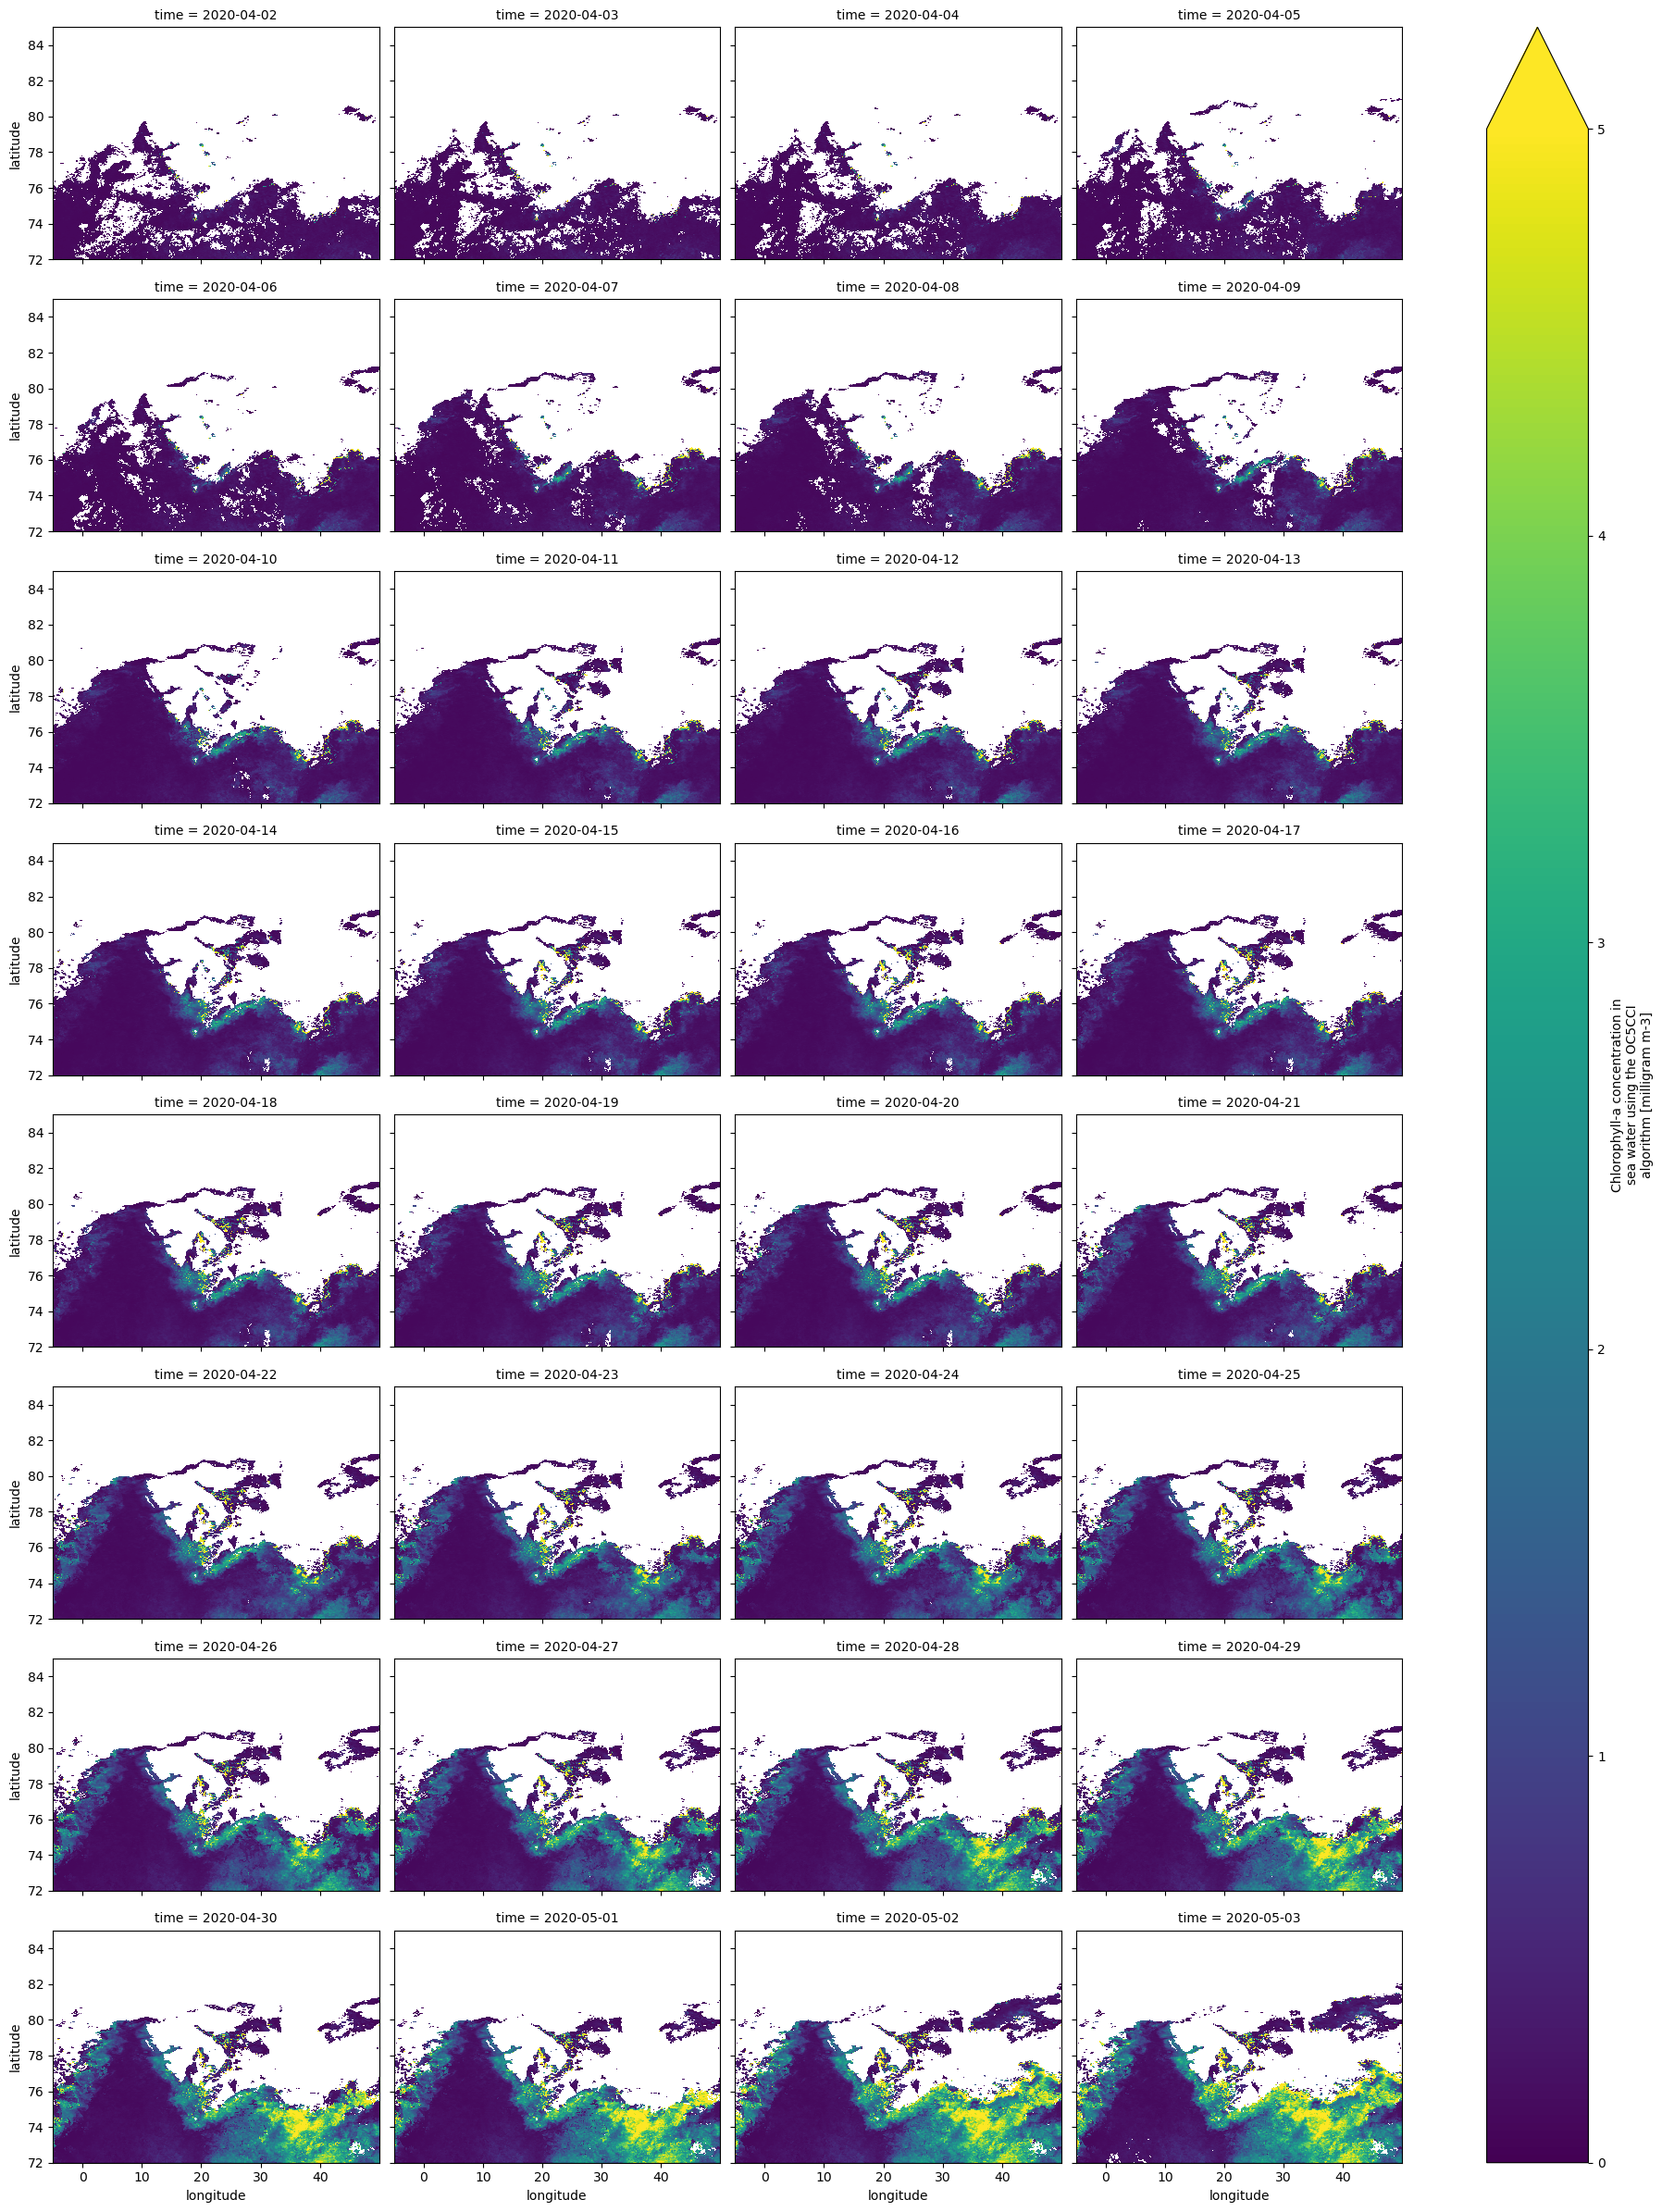

In [8]:
ds_3w.isel(time  =slice(32,64))['CHL'].plot(col='time', col_wrap=4, cmap='viridis', vmin=0, vmax=5, size=3, aspect=1.5)


In [9]:
# define 4 random points in the area
points = [(75.5, 8.5), (78, 9.5), (79, 10), (73,40)]

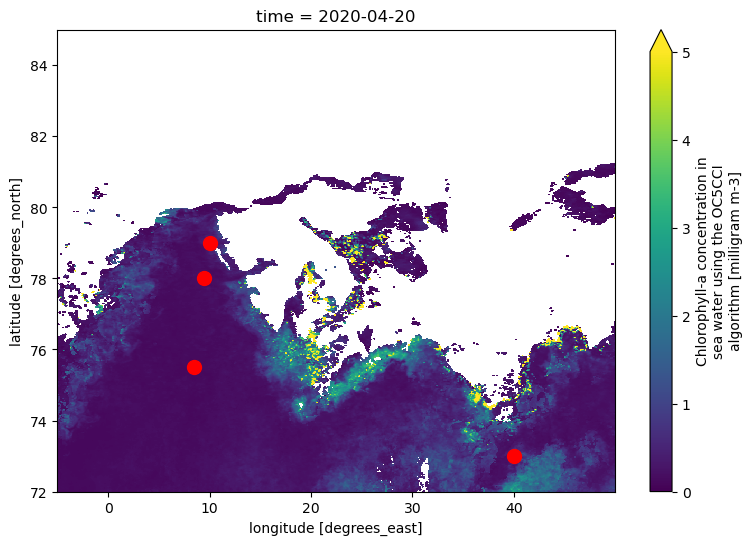

In [10]:
# show me where the points are in a map of the area plot chhl at day 50 and add the points
ds_3w.isel(time=50)['CHL'].plot(size=6, aspect=1.5, cmap='viridis', vmin=0, vmax=5)


lats, lons = zip(*points)

# Plotting the points on the map
plt.scatter(lons, lats, c='red', s=100)  # Adjust color (c) and size (s) as needed


(75.5, 78, 79, 73)

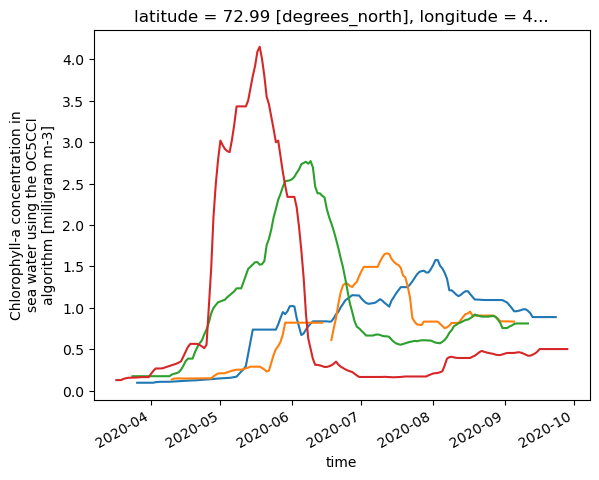

In [19]:
#   for each point extract the values of chl and time and plot them
for point in points:
    lat, lon = point
    chl = ds_3w.sel(latitude=lat, longitude=lon, method='nearest')['CHL']
    chl.plot(label=point)



In [24]:
#print dimension of chl
chl.dims

('time',)

In [25]:
#   for each point extract the values of chl and stack them on a dataframe labelling the points as A, B, C, D
df = pd.DataFrame()
for point in points:
    lat, lon = point
    chl = ds_3w.sel(latitude=lat, longitude=lon, method='nearest')['CHL']
    df[point] = chl.values


In [26]:
df

(75.5, 8.5)  (78, 9.5)  (79, 10)  (73, 40)
0            NaN        NaN       NaN       NaN
1            NaN        NaN       NaN       NaN
2            NaN        NaN       NaN       NaN
3            NaN        NaN       NaN       NaN
4            NaN        NaN       NaN       NaN
..           ...        ...       ...       ...
240          NaN        NaN       NaN       NaN
241          NaN        NaN       NaN       NaN
242          NaN        NaN       NaN       NaN
243          NaN        NaN       NaN       NaN
244          NaN        NaN       NaN       NaN

[245 rows x 4 columns]

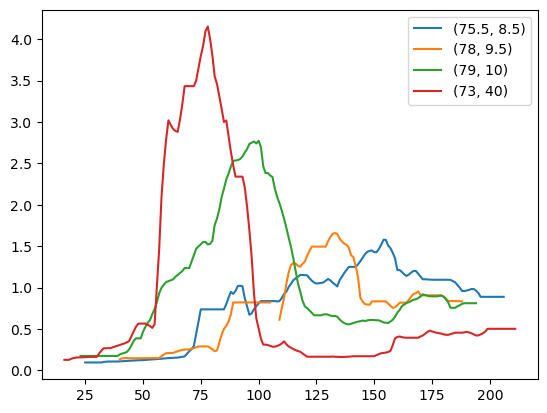

In [28]:
# plot the first column of the dataframe
df.iloc[:,0].plot()
#add the other columns
df.iloc[:,1].plot()
df.iloc[:,2].plot()
df.iloc[:,3].plot()

# add a legend with the names of the columns
plt.legend(df.columns)

AttributeError: 'Line2D' object has no property 'cmap'

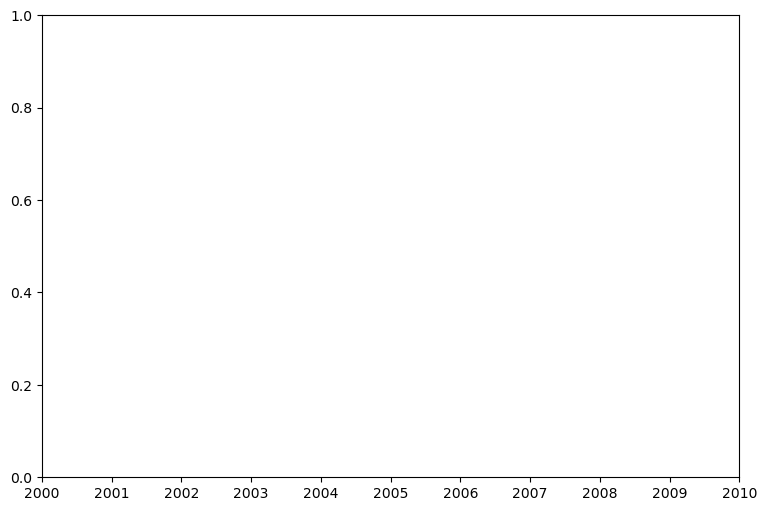

In [ ]:
# plot ts
ts.plot(size=6, aspect=1.5, cmap='viridis', vmin=0, vmax=5)

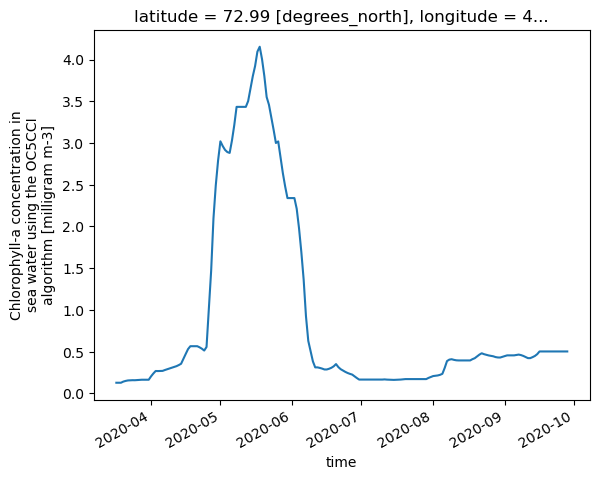

In [12]:
# plot ts
ts = ds_3w.sel(latitude=points[3][0], longitude=points[3][1], method='nearest')['CHL'].plot(label='point 1')